# PA 3: Evaluation and Comparison on Deep learning Models
Trina Brough Spring 2024

## 1. Understanding Evaluation Metrics (20 points)


### 1.1 Please explain the following commonly used evaluation metrics. (10 points)
- Accuracy: Accuracy is how often the model predicts the outcome correctly. It is the percentage correct calculated by: the number of samples correctly classified divided by the total number of samples. It answers the question: how often is the model right? Accuracy is simple to calculate and easy to understand but it is not very helpful if our classes are imbalanced or if what we really care about is predicting events that rarely occur.
- Precision: Precision measures how often a model correctly predicts the positive class out of the predicted positives. It is the percentage calculated by: the number of true positive predictions divided by the total number of positive predictions (both true and false). It answers the question: how often are the positive predictions correct? Precision addresses the problem that accuracy has when dealing with unbalanced classes. It is especially helpful when the cost of a false positive is high (but are okay if you miss some positives (false negatives)). Precision is best when we care more about "being right" than detecting them all.
- Recall: Recall measures how often a model correctly predicts the positive (true positives) out of all the actual positives. It is the percentage calculated by: the number of true positive predictions divided by the total number of positives (true positives plus false negatives). It answers the question: how well does a model find all instances of the positive class? Recall addressed the problem that accuracy has when dealing with unbalanced classes. It is especially helpful when the cost of a false negative is high (but are okay with some false positives). Recall is best when we care more about detecting them all than "being right".
- F1 Score: The F1 score is a way of averaging the precision and recall rates into one value. Because precision and recall are both rates, it creates this using the harmonic mean: 2 * (Precision * Recall) / (Precision + Recall). The result is a number between 0 and 1 that indicates how well a model classifies samples into their correct classes (0 being not classifying anything correctly and 1 being classifying all samples correctly). F1 scores is used to evaluate LLM accuracy as well as binary and multi-class classification problems (especially when classes are unbalanced). It is useful when wanting to account for both precision and recall and the costs of false negatives and false positives are relatively even. If one is more costly than the other, using straight precision or recall would be best.
- ROC Curve and AUC (Area Under the Curve): ROC is a graph that plots the True Positive Rate (Recall) on the y axis against the False Positive Rate (1 -  Precision, can be thought of as the "False Alarm Rate") on the x axis. The multiple curves are created for the classification model using different thresholds. These can then be compared on the ROC curve. The random baseline will be a straight line from the bottom left of the graph to the top right of the graph. The more the ROC curves upwards away from the baseline, the better the model is. (A perfect ROC curve would actually run staight up the y axis until 1, then turn right and run straight vertically). This upward curve is quantified by the AUC metric. It measures the area under the curve and allows us to determined which threshold is best (the largest AUC). 

### 1.2 Provide a practical scenario and explain which metric(s) should be chosen to assess the model performance in that scenario. (10 points)
Scenario: A binary classification model to identify tumors in mammogram images. The data used for this model would have unbalanced classes, since there are many more mammograms taken of healthy breast tissue than of tumors. (Of all women getting mammograms, only 0.5% have breast cancer). This means that accuracy would not be a good metric (we could classify as tumor-free every time and would be correct 99.5% of the time). We could choose to use the F1 score if the cost of false negatives and false positives is similar. However, in this case, a false positive means a woman would have the stress of coming in for more diagnostic testing but a false negative would prevent her from receiving possible life-saving treatment. The cost of a false negative is much higher than a false positive. In this case recall would be our most important metric. We want to make sure we detect all the true positives even if we end up with some false positives because lives are at stake. This isn't true without bounds, however. We could, in theory, classify every image as positive and we'd have 100% recall. This is the same problem as accuracy on the flip-side. This would result in a large cost (and stress) burden as women are re-tested unnecessarily. We might, therefore, want to plot this model using different thresholds on an ROC curve. We want to maximize our recall, which would induce us to perhaps over-categorize positives (perhaps adjusting our threshold more towards a positive classification). The ROC curves would allow us to compare the different thresholds while balancing our recall against the false positive rate. The AUC would quantify which threshold is best (in case it's not visually clear on the graph).)

## 2. Model Comparison (80 points)

### 2.1 Choose THREE commonly used deep-learning models and train these models for a specific task (e.g., image/text classification). (20 points)

To gain understanding of the metrics described above, I'd like to choose three image classification models that would likely use different metrics for evaluations. To that end, I will use:
-the MNIST as a multi-class image classification task with balanced classes. I will use the model we developed for PA 1.
-

[TODO: Describe what models/which tasks do you want to choose. Explain the motivation.]

### 2.2 Evaluate these models using appropriate metrics, and analyze the results. Complete this comparison using Jupyter Notebook. (40 points)
[TODO: Present the evaluation results with appropriate figures and tables here.]

In [66]:
# Import necessary libraries
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#### Model 1: MNIST Multi-Class Classification - Balanced Classes

##### Load MNIST Dataset

In [27]:
# Load MNIST dataset
# ref: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# train data
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test data
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 38707486.50it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100%|██████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 13621708.80it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4543412.54it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



##### Build MLP model for MNIST classification

In [28]:
# Build your Multi-Layer Perceptron (MLP) model

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        # TODO: build layers here
        self.linear_RELU_stack = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(input_size, hidden_size), 
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )
        

    def forward(self, x):
        # TODO: build the networks
        x = self.linear_RELU_stack(x)
        return x


##### Instantiate the model

In [29]:
# Instantiate the MLP model

input_size = 28 * 28  # what's input size? hints: flattened size for one instance
hidden_size = 528  # define on your own
output_size = 10  # what's output size for this classification tasks?
model = MLP(input_size, hidden_size, output_size)

##### Definitions

In [30]:
# Define the loss function and optimizer

learning_rate =  .001 # define your own learning rate here
criterion = torch.nn.CrossEntropyLoss()  # which loss function should we use here? Using Cross Entropy, online this is mentioned as a good loss function for MNIST categorization
optimizer = torch.optim.SGD (model.parameters(), lr = learning_rate)  # which optimizer do you use? Using Stochastic Gradient Descent


##### Train Model

In [31]:
# Train the model

def train(train_loader, num_epochs):
    for i in range(num_epochs):
        epoch_loss = 0
        for X,y in train_loader: #loop through the batches created and train one batch at a time (enumerate a loader object return a tuple: (batch number, training data)
            #forward pass
            predictions = model(X)
            loss = criterion(predictions, y)
            #backpropagation
            loss.backward() #figure derivatives with respect to each parameter
            optimizer.step() #adjust the parameters using gradient descent
            optimizer.zero_grad() #clear out the derivative values computed in backward command
            epoch_loss += loss.item()
        print("In Epoch " + str(i+1) + "/" + str(num_epochs) + ", Train Loss: " + str(epoch_loss/len(train_loader))) #report average loss over all the batches     

num_epochs =  15 # feel free to change the number of training epochs
train(train_loader, num_epochs)

In Epoch 1/15, Train Loss: 2.175731133042114
In Epoch 2/15, Train Loss: 1.7595097409890914
In Epoch 3/15, Train Loss: 1.1816150371326821
In Epoch 4/15, Train Loss: 0.8185751529644801
In Epoch 5/15, Train Loss: 0.6444968240919398
In Epoch 6/15, Train Loss: 0.5514573614988754
In Epoch 7/15, Train Loss: 0.49430621426496935
In Epoch 8/15, Train Loss: 0.45596171013200715
In Epoch 9/15, Train Loss: 0.42847017921618563
In Epoch 10/15, Train Loss: 0.4076928925285461
In Epoch 11/15, Train Loss: 0.39111244686440366
In Epoch 12/15, Train Loss: 0.37802284847952916
In Epoch 13/15, Train Loss: 0.36692707617082065
In Epoch 14/15, Train Loss: 0.3573707253344532
In Epoch 15/15, Train Loss: 0.3492810119634498


##### Evaluate the Model

In [32]:
def evaluation(test_loader):
    total = 0
    correct = 0
    with torch.no_grad(): #don't need to store gradients this time
        for X, y in test_loader:
            predictions = model(X)
            _, predicted = torch.max(predictions.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    test_accuracy = 100 * (correct / total)
    print('Test Accuracy: %.2f %%' % test_accuracy)
            
            
evaluation(test_loader)

Test Accuracy: 90.55 %


###### Model Review
Since we have balanced classes and don't have any particular cost or risk difference between false positives and false negatives, accuracy is an appropriate metric to use in this case. With 10 balanced classes, our random baseline would be 10%. Our accuracy of 90% far exceeds our baseline.

#### Model 2: Brain Tumor Binary Classification - Unbalanced Classes

##### Data Import and Preparation

In [3]:
#import brain tumor classification data from hugging face
from datasets import load_dataset

dataset = load_dataset("sartajbhuvaji/Brain-Tumor-Classification")

Found cached dataset imagefolder (C:/Users/trina/.cache/huggingface/datasets/sartajbhuvaji___imagefolder/sartajbhuvaji--Brain-Tumor-Classification-5ca63585a73c92fc/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3264
    })
})

In [57]:

df = pd.DataFrame(dataset['train'])
df


,image,label
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
...,...,...
3259,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3
3260,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3
3261,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3
3262,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3


In [74]:
#Want this to be a binary classification - original labels are multi-class: 0, 1, 3 are types of tumors, 2 is no tumor
df['label'] = [1 if lbl == 2 else 0 for lbl in df['label']]


<Axes: xlabel='label'>

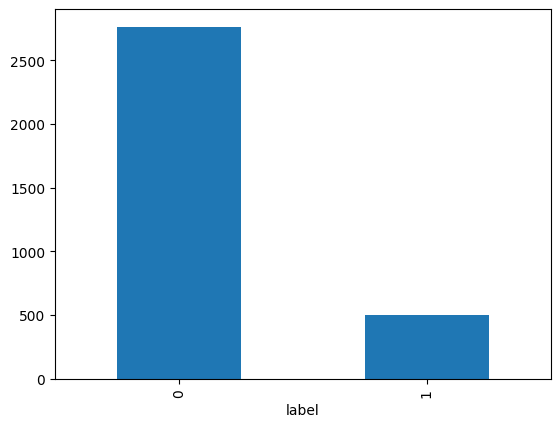

In [75]:
df['label'].value_counts().plot.bar()

In [89]:
classes = df['label'].value_counts()
baseline = classes[0] / classes.sum()
baseline

0.8468137254901961

Classes are imbalanced. This will affect the metric we choose to use.

In [76]:
#Convert labels to tensor

# Extract the values from the column
labels = df['label'].values

# Convert the values to a PyTorch tensor
labels_tensor = torch.tensor(labels)


In [78]:
labels_tensor.unique()

tensor([0, 1])

In [56]:
##TODO: delete - for learning purposes
#torch and normalize and split
transform = transforms.ToTensor()
transform(df['image'].iloc[3]).shape

torch.Size([3, 581, 524])

In [65]:
#Convert images to a tensor
#My images are of varying size so need to resize, convert to a tensor and normalize
desired_height = 400
desired_width = 380
transform = transforms.Compose([
    transforms.Resize((desired_height, desired_width)),  # Resize the images to a common size
    transforms.ToTensor(),  # Convert PIL images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the tensor values
])
images_tensor = torch.stack([transform(img) for img in df['image']])#transform each image then put all images into one tensor
images_tensor.shape

torch.Size([3264, 3, 400, 380])

In [79]:
#Split into training and test data sets and create dataLoader objects
batch_size = 64

train_images, test_images, train_labels, test_labels = train_test_split(images_tensor, labels_tensor, test_size=0.2, random_state=42)
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

# Create DataLoader objects for training and test data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [68]:
# Instantiate model (use MLP defined above)

input_size = 3 * desired_height * desired_width
hidden_size = 528 
output_size = 2  # binary classification
binary_model = MLP(input_size, hidden_size, output_size)

In [69]:
# Define the loss function and optimizer

learning_rate =  .001 
criterion = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD (binary_model.parameters(), lr = learning_rate) 

In [80]:
# Train the model

def train(train_loader, num_epochs):
    for i in range(num_epochs):
        epoch_loss = 0
        for X,y in train_loader: #loop through the batches created and train one batch at a time (enumerate a loader object return a tuple: (batch number, training data)
            #forward pass
            predictions = binary_model(X)
            loss = criterion(predictions, y)
            #backpropagation
            loss.backward() #figure derivatives with respect to each parameter
            optimizer.step() #adjust the parameters using gradient descent
            optimizer.zero_grad() #clear out the derivative values computed in backward command
            epoch_loss += loss.item()
        print("In Epoch " + str(i+1) + "/" + str(num_epochs) + ", Train Loss: " + str(epoch_loss/len(train_loader))) #report average loss over all the batches     

num_epochs =  15 
train(train_loader, num_epochs)

In Epoch 1/15, Train Loss: 0.64912066808561
In Epoch 2/15, Train Loss: 0.6490452871090029
In Epoch 3/15, Train Loss: 0.6490434306423839
In Epoch 4/15, Train Loss: 0.6490060759753715
In Epoch 5/15, Train Loss: 0.649039444400043
In Epoch 6/15, Train Loss: 0.6490765170353215
In Epoch 7/15, Train Loss: 0.6490788270787495
In Epoch 8/15, Train Loss: 0.6490993179926058
In Epoch 9/15, Train Loss: 0.6490310881195999
In Epoch 10/15, Train Loss: 0.6490929533795613
In Epoch 11/15, Train Loss: 0.6490422181966828
In Epoch 12/15, Train Loss: 0.6490418780140761
In Epoch 13/15, Train Loss: 0.6490640654796507
In Epoch 14/15, Train Loss: 0.6490285861782912
In Epoch 15/15, Train Loss: 0.6490597913904887


In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluation(test_loader):
    predictions_list = []
    true_labels_list = []
    
    with torch.no_grad(): #don't need to store gradients this time
        for X, y in test_loader:
            predictions = binary_model(X)
            _, predicted = torch.max(predictions.data, 1)
            predictions_list.extend(predicted.tolist())
            true_labels_list.extend(y.tolist())
    
    # Calculate metrics
    test_accuracy = accuracy_score(true_labels_list, predictions_list) * 100
    test_precision = precision_score(true_labels_list, predictions_list, average='binary') * 100
    test_recall = recall_score(true_labels_list, predictions_list, average='binary') * 100
    test_F1 = f1_score(true_labels_list, predictions_list, average='binary') * 100
    
    print('Test Accuracy: %.2f %%' % test_accuracy)
    print('Test Precision: %.2f %%' % test_precision)
    print('Test Recall: %.2f %%' % test_recall)
    print('Test F1: %.2f %%' % test_F1)

evaluation(test_loader)


Test Accuracy: 84.99 %
Test Precision: 25.00 %
Test Recall: 2.13 %
Test F1: 3.92 %


This model is specifically trying to detect brain tumors based on MRI images. The classes are highly unbalanced (our baseline accuracy is 84.6 %). The fact that this model's accuracy is pretty much the same as our baseline not only means that this is very poor model but likely that the model mostly just learned to categorize all data as the majority class. Since there is a high cost to missing a brain tumor, we would prefer our model catch all positive (non-majority) cases (even if it falsely identifies some as positive). This means that recall would be a meaningful evaluation metric for us. A recall of 2% indicates that this model only identifies 2% of the actual positives as positive. This would be disastrous and would rule out this model (at least without serious modification). There is also some justification to look at the precision metric. Receiving a false positive would lead to additional expensive testing as well as a significate amount of stress to the patients. While I believe recall is more pressing (making sure we don't miss any positives), there is still a cost associated with false positives. A precision of 25% indicates that when we predict positive, we are correct 25% of the time. This again shows this to be a poor model.

#### Model 3: 

In [8]:
#create (or import) model 3

### 2.3 Discuss the potential shortcomings of the metrics that you choose. What’s the possible solutions to improve the shortcomings? (20 points)
[TODO: Discuss here]

Sources:
- "Accuracy vs. precision vs. recall in machine learning: what's the difference?" https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Accuracy%20is%20a%20metric%20that,often%20the%20model%20is%20right%3F
- "Understanding and Applying F1 Score: AI Evaluation Essentials with Hands-On Coding Example" https://arize.com/blog-course/f1-score/#:~:text=F1%20score%20is%20often%20preferred,number%20of%20non%2Dspam%20emails.
- "How to explain the ROC curve and ROC AUC score?" https://www.evidentlyai.com/classification-metrics/explain-roc-curve
- "What Percentage of Abnormal Mammograms Are Cancer?" https://www.medicinenet.com/what_percentage_of_abnormal_mammograms_are_cancer/article.htm
- Dataset: "sartajbhuvaji/Brain-Tumor-Classification" https://huggingface.co/datasets/sartajbhuvaji/Brain-Tumor-Classification